In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['credit-card-data.csv', 'hr_data.csv']


In [25]:
data_path = '../input/hr_data.csv' # Path to data file
data = pd.read_csv(data_path) 
data.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [26]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [27]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


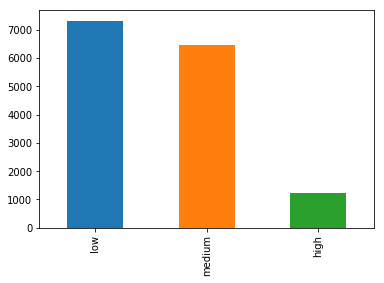

In [28]:
data['salary'].value_counts().plot(kind='bar')

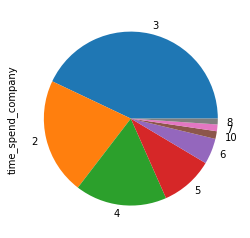

In [29]:
data['time_spend_company'].value_counts().plot(kind='pie')

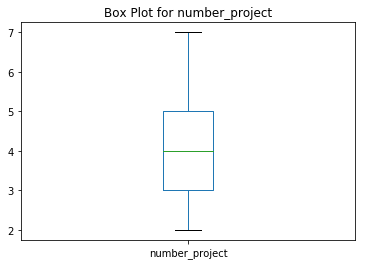

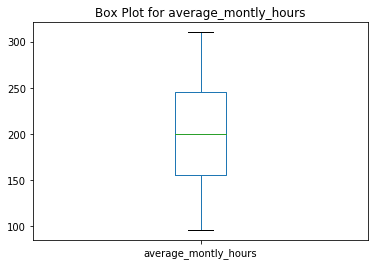

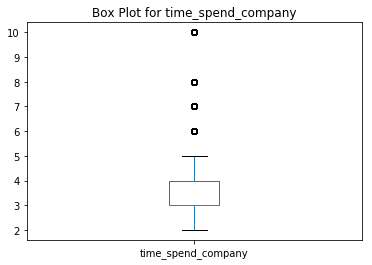

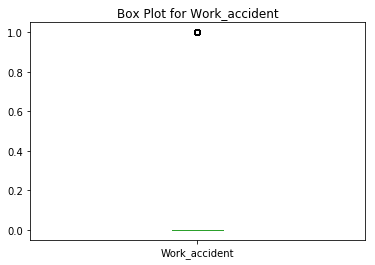

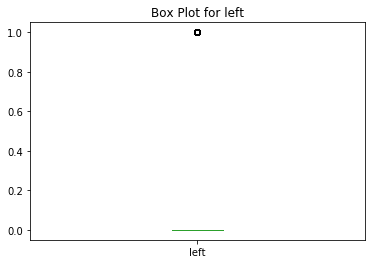

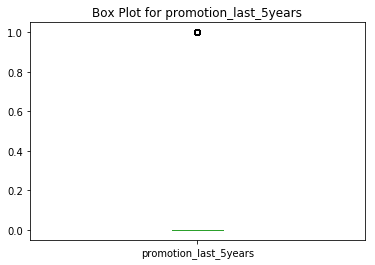

In [30]:
for col in data.columns[2:8]:
    data[col].plot(kind='box')
    plt.title('Box Plot for '+col)
    plt.show()

In [31]:
cluster_data = data[['satisfaction_level','time_spend_company']]
cluster_data.head()

,satisfaction_level,time_spend_company
0,0.38,3
1,0.80,6
2,0.11,4
3,0.72,5
4,0.37,3


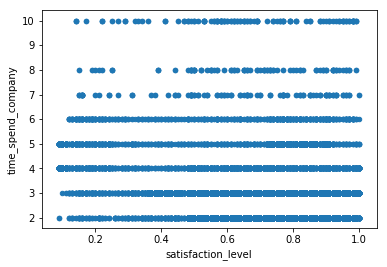

In [32]:
cluster_data.plot(kind='scatter',x='satisfaction_level',y='time_spend_company')

In [33]:
#Checking missing data
missing_data_results = cluster_data.isnull().sum()
print(missing_data_results)

satisfaction_level    0
time_spend_company    0
dtype: int64


In [34]:
data_values = cluster_data.iloc[ :, :].values
data_values

array([[0.38, 3.  ],
       [0.8 , 6.  ],
       [0.11, 4.  ],
       ...,
       [0.37, 3.  ],
       [0.11, 4.  ],
       [0.37, 3.  ]])

In [35]:
from sklearn.cluster import KMeans

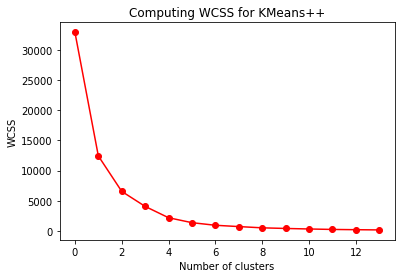

In [36]:
#WCSS (within-cluster sums of squares) to find a number of clusters
wcss = []
for i in range( 1, 15 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( data_values )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300) 
cluster_data["cluster"] = kmeans.fit_predict( data_values )
cluster_data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,satisfaction_level,time_spend_company,cluster
0,0.38,3,0
1,0.80,6,1
2,0.11,4,1
3,0.72,5,1
4,0.37,3,0
5,0.41,3,0
6,0.10,4,1
7,0.92,5,1
8,0.89,5,1
9,0.42,3,0


In [38]:
cluster_data['cluster'].value_counts()

0    9687
1    4748
2     564
Name: cluster, dtype: int64

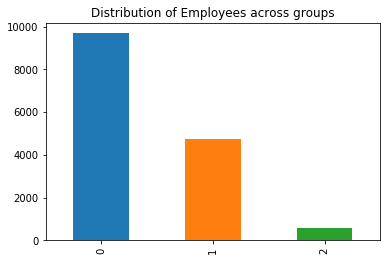

In [39]:
cluster_data['cluster'].value_counts().plot(kind='bar',title='Distribution of Employees across groups')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


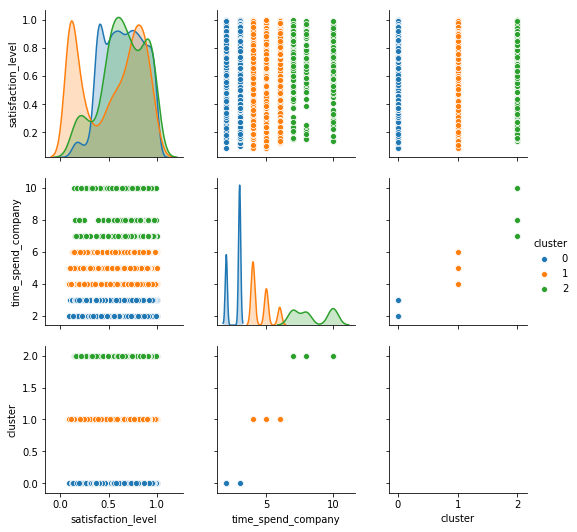

In [40]:
sns.pairplot( cluster_data, hue="cluster")

In [41]:
grouped_cluster_data = cluster_data.groupby('cluster')
grouped_cluster_data

In [42]:
grouped_cluster_data.describe()

satisfaction_level                            ...  time_spend_company                 
                     count      mean       std   min  ...                 25%  50%   75%   max
cluster                                               ...                                     
0                   9687.0  0.650011  0.203151  0.09  ...                 2.0  3.0   3.0   3.0
1                   4748.0  0.532369  0.309193  0.09  ...                 4.0  4.0   5.0   6.0
2                    564.0  0.651667  0.225363  0.14  ...                 7.0  8.0  10.0  10.0

[3 rows x 16 columns]

cluster
0    [AxesSubplot(0.125,0.68;0.775x0.2), AxesSubplo...
1    [AxesSubplot(0.125,0.68;0.775x0.2), AxesSubplo...
2    [AxesSubplot(0.125,0.68;0.775x0.2), AxesSubplo...
dtype: object

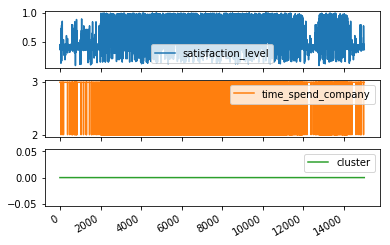

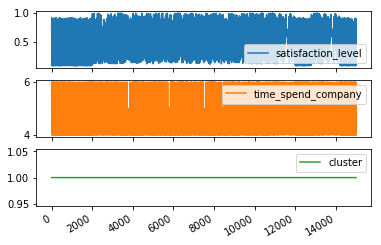

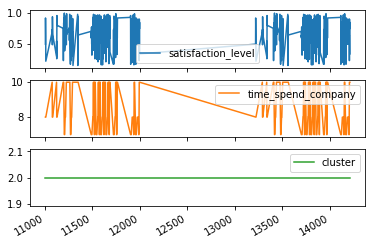

In [43]:
grouped_cluster_data.plot(subplots=True)